# Project #5_1 Artificial intelligance (Neural Networks)
# (Spring 2022)

    Amirmahdi Ansaripour

    Student ID: 810198358
    
    
Approach:

Building a Feed-Forward Neural Network from scratch, and training it on a dataset containing hand-written Persian numbers.

In [914]:
import pickle
import numpy as np
import matplotlib.pyplot as plot
import copy
import pandas as pds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
testRatio = 0.5
epsilon = 1e-10
INPUT_SHAPE = 625
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32
dataFile = open('dataset/data.pkl', 'rb')
data = pickle.load(dataFile)
labelFile = open('dataset/labels.pkl', 'rb')
label = pickle.load(labelFile)

In [915]:
def showImageFromTrain(image):
    plot.figure(0)
#     image = np.resize(image, (25, 25))
    plot.imshow(image)
    unique, counts = np.unique(data[0], return_counts = True)
    print("Unique values and their frequency in the picture : ")
    print(np.asarray((unique, counts)).T)
    plot.show()
    return

def divideToTrainandTest(trainDataFrame, label, ratio):
    
    X_train, X_test, y_train, y_test = train_test_split(trainDataFrame, label, 
   stratify = LabelEncoder().fit_transform(label), 
    test_size = ratio, random_state=0)
    
    return X_train, X_test, y_train, y_test 

def showImageFromAllClasses(dataFrame, label):
    for i in range(0, 10):
        for j in range(len(label)):
            if(label[j] == i):
                print("Label : " + str(i))
                showImageFromTrain(dataFrame[j])
                break
    return

def showFreqs(test, titl):
    df = pds.DataFrame({'freq': test})
    df.groupby('freq').size().plot(kind='bar')
    plot.xlabel("Class")
    plot.ylabel("Count")
    plot.title(titl)
    plot.show()
    return
    
    
def makeDataFrame(label, frame):
    df = pds.DataFrame(data=numpy_data).T
    return df

def normalize(df):
    df = df / 255
    return df

def testModule(model, test):
    ans = model(test)
    plot.plot(test, ans)
    plot.xlabel("input")
    plot.ylabel("output")
    plot.title("activation fuction")
    plot.show()

    ans = model.derivative(test)
    plot.plot(test, ans)
    plot.xlabel("input")
    plot.ylabel("output")
    plot.title("activation fuction")
    
    plot.show()
    return


### Data Visualization and Pre-processing

* Displaying one sample of each class 
* Dividing into train and test sets 
* Reshaping all images to a fixed scale 
* Showing the percentage of each label 
* Normalizing colors to the $\{ 0, 1 \}$ interval.

Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


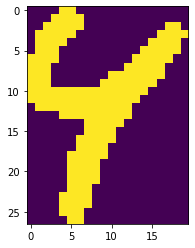

Label : 0
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


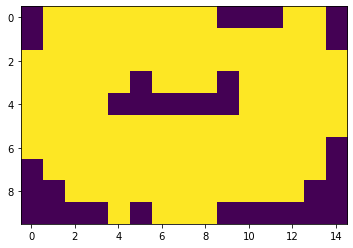

Label : 1
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


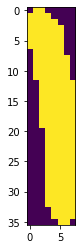

Label : 2
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


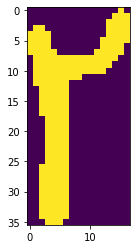

Label : 3
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


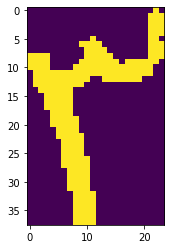

Label : 4
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


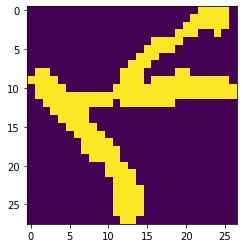

Label : 5
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


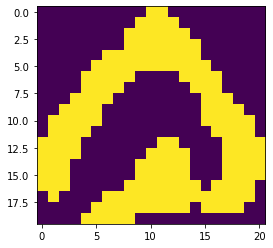

Label : 6
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


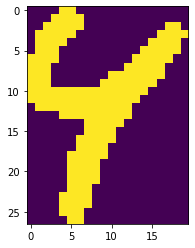

Label : 7
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


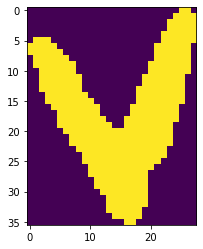

Label : 8
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


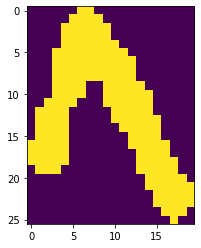

Label : 9
Unique values and their frequency in the picture : 
[[  0 364]
 [255 176]]


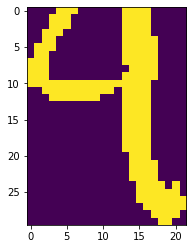

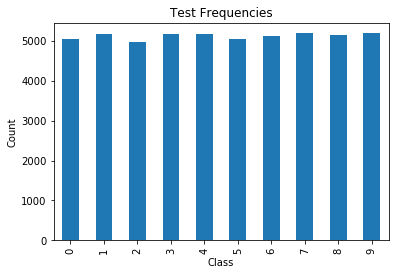

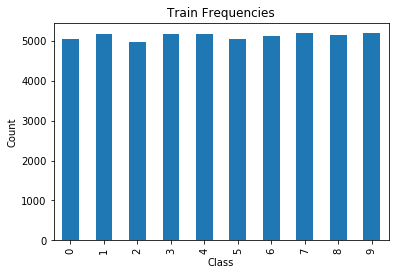

In [916]:

showImageFromTrain(data[0])

showImageFromAllClasses(data, label)


for i in range(len(data)):
    data[i] = np.resize(data[i], (25, 25))

flattened = [[]] * len(data)
index = 0
for image in data:
   flattened[index] = np.array(image).flatten()
   index += 1
# print(flattened[0])    

resultDF = pds.DataFrame(flattened)
# resultDF.to_csv("result.csv")

resultDF.insert(625, 'label', label) 
# resultDF.to_csv("result.csv")

X_train, X_test, y_train, y_test = divideToTrainandTest(resultDF, resultDF['label'], testRatio)

X_train = X_train.drop(['label'], axis = 1)
X_test = X_test.drop(['label'], axis = 1)


# X_test.to_csv("X_test.csv")
# X_train.to_csv("X_train.csv")
# y_train.to_csv("y_train.csv")
# y_test.to_csv("y_test.csv")

showFreqs(y_test, "Test Frequencies")
showFreqs(y_train, "Train Frequencies")

X_train = normalize(X_train)


X_test = normalize(X_test)



Why did we normalize the pixcels?

Because when initializing and updating weight vector, for example $x_1 = 0, x_2 = 255$, the new value $(w_1x_1 + w_2x_2)$ will be biased to $x_2$ value.

### Part 2

### Dataloader

Making images proper to feed into a neural networks. (flattening, shuffling, one-hot labeling) 

In [917]:
class Dataloader:
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''
        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.onehot_labels = self.__onehot(labels, self.__n_classes)
        
    def __onehot(self, labels, n_classes):
        '''
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        
        return np.eye(n_classes)[labels]
    
        
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        pass
    
    def __iter__(self):
                    
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.onehot_labels[idx:idx+self.__batch_size]))

### Activation functions 

In [918]:
from copy import deepcopy

class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

In [919]:
class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        relu_value = [[] for row in matrix]
        i = 0
        for row in matrix:
            row = np.array(row)
            row[row < 0] = 0
            relu_value[i] = row
            i += 1
        return relu_value    
        
    def derivative(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        
        relu_derivative = [[] for row in matrix]
        i = 0
        for row in matrix:
            row = np.array(row)
            row[row < 0] = 0
            row[row > 0] = 1
            relu_derivative[i] = row
            i += 1
        return relu_derivative    
        
    def __call__(self, matrix):
        return self.__val(matrix)

# testModule(Relu(), np.linspace(-np.pi, np.pi, 12))



In [920]:
    
        
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        
        leacky_relu_value = [[] for row in matrix]
        i = 0
        for row in matrix:
            row = np.array(row)
            row[row < 0] *= self.negative_slope
            leacky_relu_value[i] = row
            i += 1
        return leacky_relu_value

    
    def derivative(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        leacky_relu_derative = [[] for row in matrix]
        i = 0
        for row in matrix:
            row = np.array(row)
            row[row > 0] = 1
            row[row < 0] = self.negative_slope
            leacky_relu_derative[i] = row
            i += 1
        return leacky_relu_derative
        
        
    def __call__(self, matrix):
        return self.__val(matrix)

# testModule(LeakyRelu(), np.linspace(-np.pi, np.pi, 12))

In [921]:
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        copied = np.matrix(matrix, dtype=float)
        sigmoid_value = 1/(1 + np.exp(-copied))
        return sigmoid_value
        
    def derivative(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        
        copied = np.matrix(matrix, dtype=float)
        return np.multiply(self.__val(copied), (1 - self.__val(copied)))

    def __call__(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
    
        return self.__val(matrix)
# testModule(Sigmoid(), np.linspace(-np.pi, np.pi, 12))


In [922]:
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        
        matrix = np.matrix(matrix, dtype=float)
        return np.matrix(np.tanh(matrix))

        #return (np.exp(matrix) - np.exp(-matrix)) / (np.exp(matrix) + np.exp(-matrix))

    def derivative(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        
        matrix = self.__val(np.matrix(matrix, dtype=float))
        return 1 - np.power(matrix, 2)
        
    def __call__(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        
        return self.__val(matrix)
# testModule(Tanh(), np.linspace(-np.pi, np.pi, 12))

### Sigmoid and Softmax for the last layer

Sigmoid for binary and softmax for multi-label classifications.

In [923]:
class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix, axis = -1):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        softmax_value = copy.deepcopy(matrix)
        for i in range(len(matrix)):
            softmax_value[i] = np.exp(matrix[i] - np.max(matrix[i])) / np.sum(np.exp(matrix[i] - np.max(matrix[i])))
        return softmax_value
        
    def __call__(self, matrix):
        '''
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        
        return self.__val(matrix)

### Cross-Entropy loss function

For categorical variables:

$$L = \Sigma_{i=1}^n (- y_i log(\hat{y_i}))$$

In [924]:
class CrossEntropy: 
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        '''
            L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_value: cross entropy of inputs
        '''
                
        assert np.shape(true_val)==np.shape(expected_val)
        copiedTrueVal = copy.deepcopy(true_val)
        copiedExpectedVal = copy.deepcopy(expected_val)
        softmaxOutput = Softmax()(copiedTrueVal)
        entropy = np.multiply(-copiedExpectedVal, np.log(
            np.clip(softmaxOutput, epsilon, 1 - epsilon)))
        return np.sum(entropy, axis = 1)
        
    def derivative(self, true_val, expected_val):
        '''
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        
#         print("np.shape(true_val) : ")
#         print(np.shape(true_val))
#         print("np.shape(expected_val) : ")
#         print(np.shape(expected_val))        
        assert np.shape(true_val)==np.shape(expected_val)
        assert np.shape(true_val)==np.shape(expected_val)
        copiedTrueVal = copy.deepcopy(true_val)
        copiedExpectedVal = copy.deepcopy(expected_val)
        softmaxOutput = Softmax()(copiedTrueVal + epsilon)
        cross_entropy_derivative = softmaxOutput - copiedExpectedVal
        return cross_entropy_derivative
        
    def __call__(self, true_val, expected_val):
        '''
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        
        return self.__val(true_val, expected_val)

### Layer Class 

Methods related to a layer in a NN. (Initialize and update weights, progressing to next layer)

In [925]:
import math

class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        
#         print("np.size(self.__weight,0)")
#         print(np.size(self.__weight,0))
#         print("np.size(layer_input,1)")
#         print(np.size(layer_input,1))
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_input = layer_input
        self.__last_activation_input = np.matmul(self.__last_input, self.__weight) + self.bias
        self.__last_activation_output = self.activation(self.__last_activation_input)
        self.__last_activation_derivative = np.squeeze(self.activation.derivative(self.__last_activation_input))
                
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        
        '''
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        
        backprop_tensor = np.squeeze(backprop_tensor)
        
        
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
    
        fixedOperand = np.multiply(backprop_tensor, self.__last_activation_derivative)
    
        updatedWeight = np.matmul(self.__last_input.transpose(), fixedOperand)
        updatedBias = np.matmul(np.matrix(np.tile(1, (1, fixedOperand.shape[0]))), fixedOperand)
        backprop_tensor = np.matmul(fixedOperand, self.__weight.transpose())
        
        self.__weight -= updatedWeight * lr
        self.__bias -= updatedBias * lr
        
        
        return backprop_tensor


    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']

        weights = np.random.uniform(low = low, high = high, size = (dim1, dim2))

        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
            
            
        weights = np.random.normal(loc = mean, scale = math.sqrt(var), size=(dim1, dim2))
        
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

### Network Class

Methods related to the network as a whole. (Adding layres, train and test phases, calculating accuracy, setting hyper-parameters).

In [926]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        
        
        self.__layers_list.append(new_layer)
        
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), learning_rate = 1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = learning_rate
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        '''
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        
        network_output = copy.deepcopy(network_input)
        
        for layer in self.__layers_list:
            network_output = np.squeeze(layer.forward(network_output))
            
    
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''

        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        
        lastLayer = self.forward(x_batch)
        
        return (self.__compute_accuracy(lastLayer, y_batch),
                self.__update_weights(lastLayer, y_batch))
        
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        
        lastLayer = self.forward(x_batch)
        
        entropy = CrossEntropy()(lastLayer, y_batch)        
        
        return (self.__compute_accuracy(lastLayer, y_batch),
                np.sum(entropy) / len(lastLayer))
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        
        outputMax = np.argmax(output, axis = 1)
        expectedMax =  np.argmax(expected_output, axis = 1)
        predictedCorrectly = np.count_nonzero(outputMax==expectedMax)
        return predictedCorrectly / np.size(output, 0)

    
    def __update_weights(self, output, y_train):
        '''
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        
        crossEntropy = CrossEntropy()
        
        deravities = crossEntropy.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
             deravities = layer.update_weights(deravities, self.__lr)
            
        return np.sum(crossEntropy(output, y_train)) / len(output)

### Q2)

What's the problem with intial value of zero for wieghts of a neural network?

In chain derivation, the weights will not get updated; Hence, the module does not learn new things

### Network Architecture

In [927]:
# Sample code for building and training a model

def buildNetwork(numOfClasses, batchSize, x_train, x_test, ytrain, ytest, inputShape, nIn,
                nOut, function, weightInitialize, learningRate):
    
    TRAINLOADER = Dataloader(x_train, ytrain, numOfClasses,
                            batchSize, False)
    
    TESTLOADER = Dataloader(x_test, ytest,
                            numOfClasses, batchSize, False)
    
    network = FeedForwardNN(inputShape)


    network.add_layer(nIn, function, 
                      weightInitialize)
#     def add_layer(self, n_neurons, 
# activation=Relu(), initial_weight='uniform', **initializing_parameters):

    network.add_layer(nIn, function, 
                      weightInitialize)
    network.add_layer(nOut, Identical(), 
                      weightInitialize)

    network.set_training_param(loss=CrossEntropy(), learning_rate=learningRate)

    log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)
    return
    
buildNetwork(20, BATCH_SIZE, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, Relu(), 'uniform', LEARNING_RATE)
    

Epoch 1:
	Train: Average Accuracy: 0.16546875	Average Loss: 2.1852742282202104
	Test: Average Accuracy: 0.25853515625	Average Loss: 1.9021241842408838
Epoch 2:
	Train: Average Accuracy: 0.434375	Average Loss: 1.5604295564207271
	Test: Average Accuracy: 0.543515625	Average Loss: 1.3140291309041234
Epoch 3:
	Train: Average Accuracy: 0.60984375	Average Loss: 1.1504650777989944
	Test: Average Accuracy: 0.66494140625	Average Loss: 0.9981527303700107
Epoch 4:
	Train: Average Accuracy: 0.69828125	Average Loss: 0.9061893624403103
	Test: Average Accuracy: 0.73380859375	Average Loss: 0.8116394621386371
Epoch 5:
	Train: Average Accuracy: 0.7530859375	Average Loss: 0.7530826427558083
	Test: Average Accuracy: 0.758984375	Average Loss: 0.7315405786830854
Epoch 6:
	Train: Average Accuracy: 0.7815234375	Average Loss: 0.667629282160205
	Test: Average Accuracy: 0.77884765625	Average Loss: 0.6752484323572987
Epoch 7:
	Train: Average Accuracy: 0.8005859375	Average Loss: 0.6135348465757433
	Test: Average A

### Learning Rate

Analyzing how learning rate affects the convergance speed (0.01, 0.0001)

In [928]:
buildNetwork(20, BATCH_SIZE, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, Relu(), 'uniform', 0.01)

Epoch 1:
	Train: Average Accuracy: 0.1003515625	Average Loss: 2.3555144063780933
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3145857960910057
Epoch 2:
	Train: Average Accuracy: 0.10017578125	Average Loss: 2.3120778769064456
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3094800171270116
Epoch 3:
	Train: Average Accuracy: 0.10017578125	Average Loss: 2.3091609435925897
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.307801325356303
Epoch 4:
	Train: Average Accuracy: 0.10017578125	Average Loss: 2.307978885746655
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3069673183025112
Epoch 5:
	Train: Average Accuracy: 0.10017578125	Average Loss: 2.3073345137361123
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3064688168320884
Epoch 6:
	Train: Average Accuracy: 0.10017578125	Average Loss: 2.3069282428609688
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3061373351886756
Epoch 7:
	Train: Average Accuracy: 0.10017578125	Average Loss: 2.30664850375625

In [929]:
buildNetwork(20, BATCH_SIZE, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, Relu(), 'uniform', 0.0001)

Epoch 1:
	Train: Average Accuracy: 0.09861328125	Average Loss: 2.307076058472271
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.2616603772446933
Epoch 2:
	Train: Average Accuracy: 0.10814453125	Average Loss: 2.2512435074497414
	Test: Average Accuracy: 0.09890625	Average Loss: 2.235702796597948
Epoch 3:
	Train: Average Accuracy: 0.12291015625	Average Loss: 2.2267253865205263
	Test: Average Accuracy: 0.1041015625	Average Loss: 2.2129132685372404
Epoch 4:
	Train: Average Accuracy: 0.1375390625	Average Loss: 2.2046250681730513
	Test: Average Accuracy: 0.1166796875	Average Loss: 2.192032869161212
Epoch 5:
	Train: Average Accuracy: 0.15126953125	Average Loss: 2.184210715374277
	Test: Average Accuracy: 0.132109375	Average Loss: 2.1724534265702764
Epoch 6:
	Train: Average Accuracy: 0.16291015625	Average Loss: 2.1648692477911324
	Test: Average Accuracy: 0.1453125	Average Loss: 2.1535405101415592
Epoch 7:
	Train: Average Accuracy: 0.172890625	Average Loss: 2.1457467356715703
	Test: Avera

## Q4)

What happens when the learning rate is so high, what about being so small?

In gradient decsent, when learning rate is too high, the module won't converge to a specific point and jumps back and front around an optima.

On the opposite, when the learning rate is too small, it's highly probable that the module will stuck in a local optima and a lot of epoches should be passed for the model to converge.

### Activatioin Function 

Analyzing different activation functions for hidden layers' nodes. (Sigmoid, hyperbulic tangent, leaky-relu)

In [930]:
buildNetwork(20, BATCH_SIZE, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, Sigmoid(), 'uniform', LEARNING_RATE)

Epoch 1:
	Train: Average Accuracy: 0.1006640625	Average Loss: 2.3575296618895587
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3124742004308403
Epoch 2:
	Train: Average Accuracy: 0.09994140625	Average Loss: 2.3108516332686064
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3084307193427005
Epoch 3:
	Train: Average Accuracy: 0.10017578125	Average Loss: 2.308681517292643
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3072124731336414
Epoch 4:
	Train: Average Accuracy: 0.10009765625	Average Loss: 2.3078620949047917
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.306631152344475
Epoch 5:
	Train: Average Accuracy: 0.09990234375	Average Loss: 2.3074298542293175
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.306291029672487
Epoch 6:
	Train: Average Accuracy: 0.099921875	Average Loss: 2.307161122925174
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.306067095109
Epoch 7:
	Train: Average Accuracy: 0.09990234375	Average Loss: 2.3069762209222695
	Test

In [931]:
buildNetwork(20, BATCH_SIZE, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, Tanh(), 'uniform', LEARNING_RATE)

Epoch 1:
	Train: Average Accuracy: 0.1005859375	Average Loss: 2.354481655928359
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3115868021032657
Epoch 2:
	Train: Average Accuracy: 0.10025390625	Average Loss: 2.310805025538035
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.308365464691536
Epoch 3:
	Train: Average Accuracy: 0.10052734375	Average Loss: 2.3090112761912174
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3073410373510996
Epoch 4:
	Train: Average Accuracy: 0.10052734375	Average Loss: 2.3083005267473578
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.306837755362478
Epoch 5:
	Train: Average Accuracy: 0.10048828125	Average Loss: 2.3079151984876565
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.30653782720197
Epoch 6:
	Train: Average Accuracy: 0.10048828125	Average Loss: 2.3076714680509993
	Test: Average Accuracy: 0.09845703125	Average Loss: 2.3063379204132337
Epoch 7:
	Train: Average Accuracy: 0.10048828125	Average Loss: 2.307501927172867
	T

In [932]:
buildNetwork(20, BATCH_SIZE, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, LeakyRelu(), 'uniform', LEARNING_RATE)

Epoch 1:
	Train: Average Accuracy: 0.1815625	Average Loss: 2.1574293952993626
	Test: Average Accuracy: 0.32140625	Average Loss: 1.7768295202640179
Epoch 2:
	Train: Average Accuracy: 0.455859375	Average Loss: 1.497509561415949
	Test: Average Accuracy: 0.57669921875	Average Loss: 1.2560575372418659
Epoch 3:
	Train: Average Accuracy: 0.6146875	Average Loss: 1.1314296827170478
	Test: Average Accuracy: 0.66494140625	Average Loss: 1.0041729108664383
Epoch 4:
	Train: Average Accuracy: 0.6926171875	Average Loss: 0.9189687539240287
	Test: Average Accuracy: 0.72716796875	Average Loss: 0.8219486423053798
Epoch 5:
	Train: Average Accuracy: 0.747890625	Average Loss: 0.7691027223236749
	Test: Average Accuracy: 0.76212890625	Average Loss: 0.727143430075984
Epoch 6:
	Train: Average Accuracy: 0.77326171875	Average Loss: 0.6914150804182759
	Test: Average Accuracy: 0.77732421875	Average Loss: 0.6830308679787666
Epoch 7:
	Train: Average Accuracy: 0.79177734375	Average Loss: 0.6365801856803596
	Test: Avera

### Some problems of sigmoid and hyperbulic tangent function

Both are nearly similar in shape, but tanh can also produce negative outputs. 

The range in which these functions have a non-Zero derivation is short([-5, 5] for sigmoid and [-2 , 2] for tanh).

As a result, if the input contains large values, the activation function will map it to its tails, which disactivates the nueron.

### Advantage of leaky relu over relu

The main advantage is that inputs having negative value won't be mapped to zero. Thus, updating weights will not stop for negative inputs. 

### Batch size (16 and 256)

When performing SGD, it is not wise to calculate the derivitive with respect to all instances. Therefore, we choose a random batch and update weights based on only those limited samples. 

In [933]:
buildNetwork(20, 16, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, LeakyRelu(), 'uniform', LEARNING_RATE)

Epoch 1:
	Train: Average Accuracy: 0.16509065332916537	Average Loss: 2.1790284087200145
	Test: Average Accuracy: 0.27633635511097215	Average Loss: 1.8791856596395131
Epoch 2:
	Train: Average Accuracy: 0.42859096592685214	Average Loss: 1.5776996178427356
	Test: Average Accuracy: 0.5339559237261644	Average Loss: 1.332385970454038
Epoch 3:
	Train: Average Accuracy: 0.5919623319787434	Average Loss: 1.1779050369244606
	Test: Average Accuracy: 0.6569631134729603	Average Loss: 1.0052519133346847
Epoch 4:
	Train: Average Accuracy: 0.6879298218193185	Average Loss: 0.9214848621688702
	Test: Average Accuracy: 0.7212996248827759	Average Loss: 0.8342757990186265
Epoch 5:
	Train: Average Accuracy: 0.7475969052829009	Average Loss: 0.7599433214532958
	Test: Average Accuracy: 0.7644381056580182	Average Loss: 0.7161563406251614
Epoch 6:
	Train: Average Accuracy: 0.7781337918099406	Average Loss: 0.6736477114931574
	Test: Average Accuracy: 0.7828813691778681	Average Loss: 0.6625237155168918
Epoch 7:
	Trai

In [934]:
buildNetwork(20, 256, X_train, X_test, y_train, y_test, INPUT_SHAPE, 16,
                20, LeakyRelu(), 'uniform', LEARNING_RATE)

Epoch 1:
	Train: Average Accuracy: 0.13987944504310346	Average Loss: 2.3126519255246727
	Test: Average Accuracy: 0.23459321120689655	Average Loss: 2.193755803409946
Epoch 2:
	Train: Average Accuracy: 0.2882745150862069	Average Loss: 1.9272191759082618
	Test: Average Accuracy: 0.31527613146551725	Average Loss: 1.8964768026080414
Epoch 3:
	Train: Average Accuracy: 0.4252714170258621	Average Loss: 1.5541070567861233
	Test: Average Accuracy: 0.37985183189655175	Average Loss: 1.6829402307703203
Epoch 4:
	Train: Average Accuracy: 0.5374346713362069	Average Loss: 1.2907998585399747
	Test: Average Accuracy: 0.4541864224137931	Average Loss: 1.534700679094617
Epoch 5:
	Train: Average Accuracy: 0.638620016163793	Average Loss: 1.051748934859799
	Test: Average Accuracy: 0.7072811153017241	Average Loss: 0.851279017542295
Epoch 6:
	Train: Average Accuracy: 0.7026293103448276	Average Loss: 0.8860417963834917
	Test: Average Accuracy: 0.7505724676724138	Average Loss: 0.7535828775219551
Epoch 7:
	Train: 

### Conclusions

We have learnt different componenets of a nueral network and how they are implemented. What's more, we tested different activation functions, batch sizes, and learning rates, observing how the accuracy of model is affected by them.

### Refrences

https://datascience.stackexchange.com/questions/14349/difference-of-activation-functions-in-neural-networks-in-general

https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
